<a href="https://colab.research.google.com/github/anjelica0224/MLPR/blob/main/bounding_boxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
import cv2

In [ ]:
 import numpy as np

In [ ]:
import matplotlib.pyplot as plt

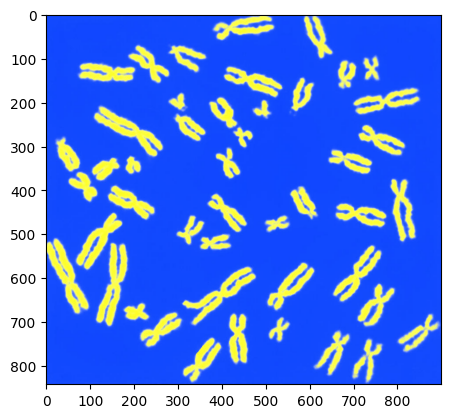

In [ ]:
image= cv2.imread('/content/chromosomes.jpg')
image_to_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = np.array(image_to_rgb)
plt.imshow(pixels)


array([[79, 79, 79, ..., 80, 81, 81],
       [79, 79, 79, ..., 80, 80, 81],
       [79, 79, 79, ..., 79, 80, 80],
       ...,
       [83, 81, 79, ..., 82, 82, 82],
       [85, 83, 81, ..., 82, 82, 82],
       [85, 83, 81, ..., 82, 82, 82]], dtype=uint8)
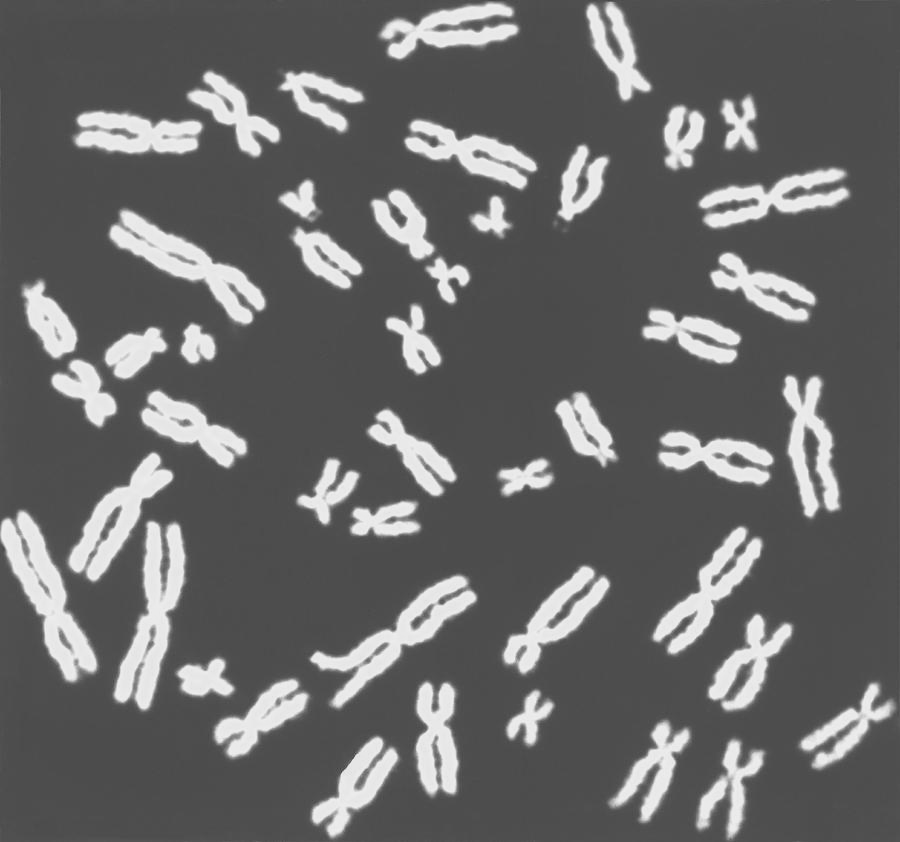

In [ ]:
gray = cv2.cvtColor(pixels, cv2.COLOR_RGB2GRAY )
pixels_gray = np.array(gray)
pixels_gray

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morph = cv2.morphologyEx(pixels_gray, cv2.MORPH_CLOSE, kernel)

In [ ]:
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

array([[79, 79, 79, ..., 80, 81, 81],
       [79, 79, 79, ..., 80, 80, 81],
       [79, 79, 79, ..., 79, 80, 80],
       ...,
       [83, 81, 81, ..., 82, 82, 82],
       [85, 83, 82, ..., 82, 82, 82],
       [85, 83, 82, ..., 82, 82, 82]], dtype=uint8)
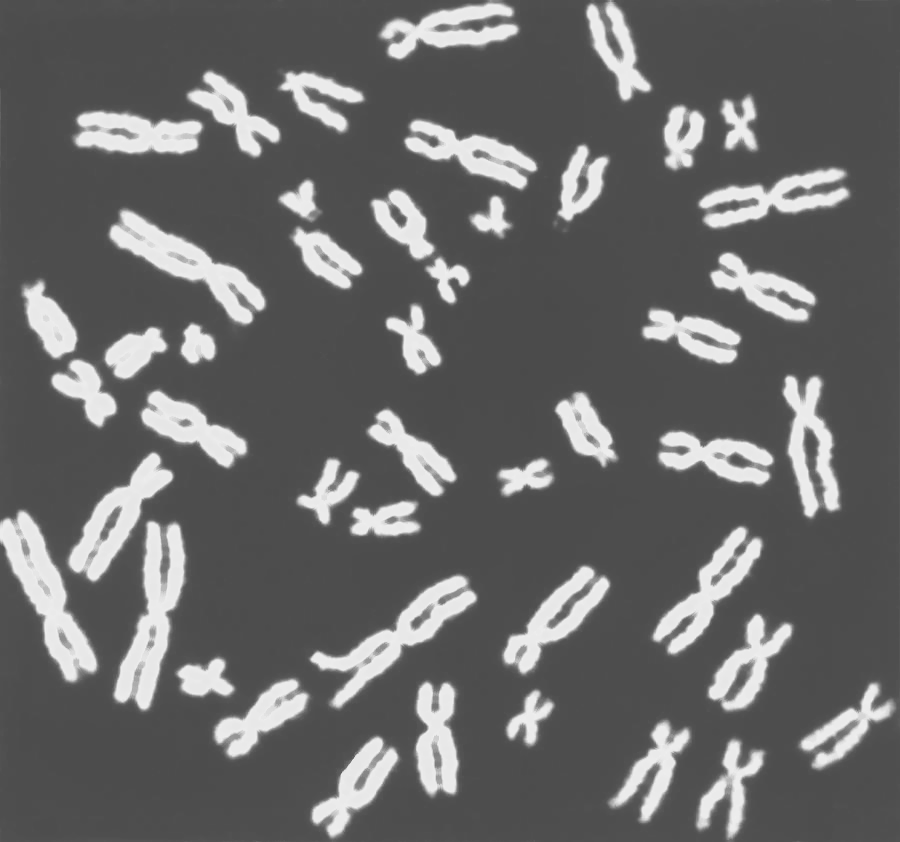

In [ ]:
morph

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
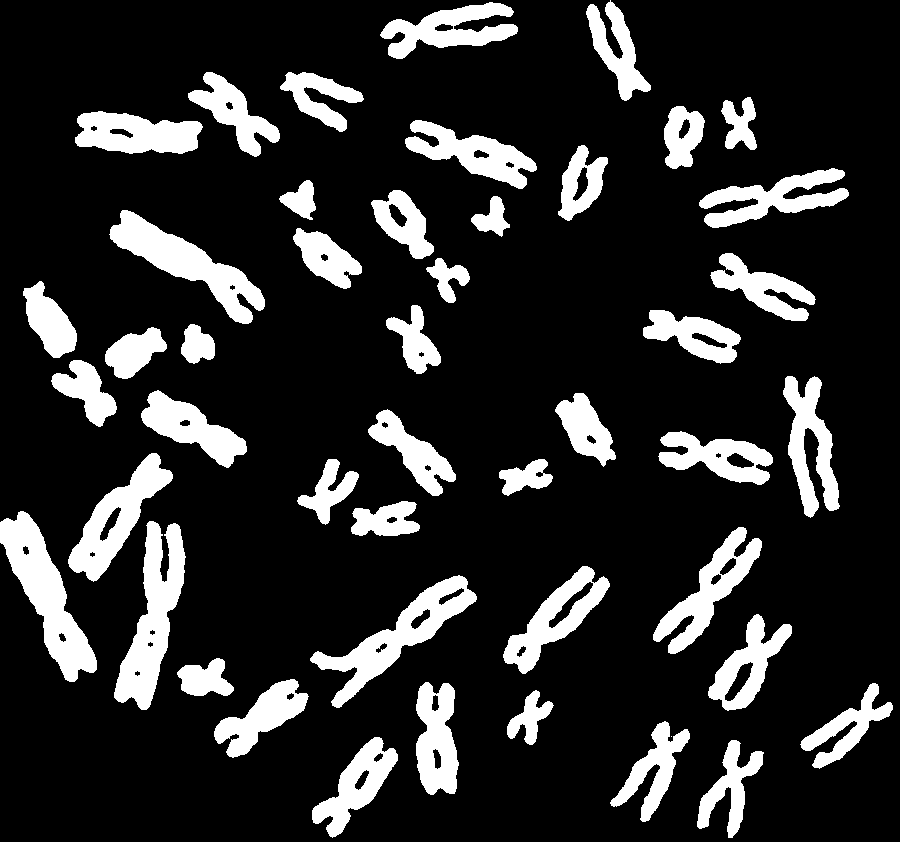

In [ ]:
th, otsu = cv2.threshold(morph, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

otsu

In [ ]:
th

151.0

In [ ]:
contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


In [ ]:
contours

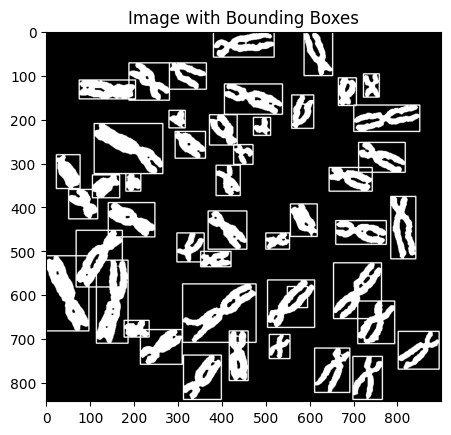

Features:
    Height  Width    Area   Perimeter  Circularity
0       98     67  2197.5  408.291411     0.165653
1      101     86  3358.0  342.818322     0.359056
2       22     16   151.0   56.769552     0.588784
3       11     11    57.5   31.213203     0.741653
4        1      1     0.0    0.000000     0.000000
..     ...    ...     ...         ...          ...
83      85     92  2758.0  342.534052     0.295391
84      10      9    48.5   27.556349     0.802617
85      57    138  3616.5  524.374671     0.165278
86       9     20   114.0   46.970562     0.649327
87     101     65  2445.5  402.232536     0.189943

[88 rows x 5 columns]


In [ ]:
import pandas as pd
features = []
if len(contours) >= 5:
  image_copy = otsu.copy()
  for i in contours:
      x, y, w, h = cv2.boundingRect(i)
      # approx = cv2.approxPolyDP(i, 0.01 * cv2.arcLength(i, True), True)
      # ellipse = cv2.fitEllipse(i)
      area = cv2.contourArea(i)
      perimeter = cv2.arcLength(i, True)
      if perimeter != 0:
            circularity = (4 * np.pi * area) / (perimeter ** 2)
      else:
            circularity = 0
      features.append({
          'Height': h,
          'Width': w,
          'Area': area,
          'Perimeter': perimeter,
          'Circularity': circularity
      })
      cv2.rectangle(image_copy, (x, y), (x + w, y + h), (255,0, 0), 2)
  features_df = pd.DataFrame(features)
  plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
  plt.title('Image with Bounding Boxes')
  plt.show()
  print("Features:")
  print(features_df)

else:
  print("Less than 5 contours found.")



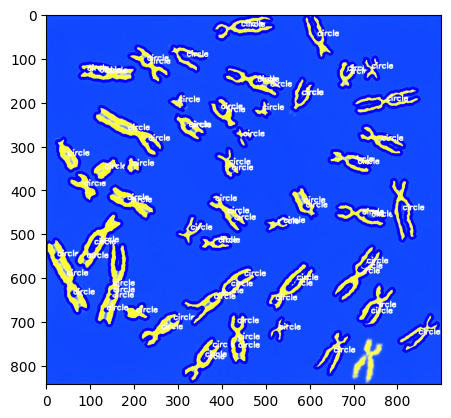

In [ ]:
## trying a different way for shape feature
i = 0
for contour in contours:

    # here we are ignoring first counter because
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue

    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)

    cv2.drawContours(pixels, [contour], 0, (0, 0, 255), 5)

    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])

    if len(approx) == 3:
        cv2.putText(pixels, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 4:
        cv2.putText(pixels, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 5:
        cv2.putText(pixels, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    elif len(approx) == 6:
        cv2.putText(pixels, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    else:
        cv2.putText(pixels, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

plt.imshow(pixels)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
standardized_features = scaler_standard.fit_transform(features_df)
standardized_df = pd.DataFrame(standardized_features, columns=features_df.columns)
print('Standardized Features:\n', standardized_df)

scaler_minmax = MinMaxScaler()
normalized_features = scaler_minmax.fit_transform(features_df)
normalized_df = pd.DataFrame(normalized_features, columns=features_df.columns)
print('Normalized Features:\n', normalized_df)

Standardized Features:
       Height     Width      Area  Perimeter  Circularity
0   1.185655  0.430878  0.430043   1.239235    -1.519423
1   1.257546  0.887133  1.133362   0.861539    -0.655236
2  -0.635581 -0.793808 -0.810235  -0.788594     0.371257
3  -0.899181 -0.913875 -0.866900  -0.936022     1.054326
4  -1.138817 -1.154010 -0.901748  -1.116082    -2.259610
..       ...       ...       ...        ...          ...
83  0.874128  1.031214  0.769733   0.859899    -0.939714
84 -0.923144 -0.961902 -0.872355  -0.957117     1.326729
85  0.203146  2.135832  1.290025   1.908886    -1.521097
86 -0.947108 -0.697754 -0.832659  -0.845122     0.641781
87  1.257546  0.382851  0.580343   1.204283    -1.410886

[88 rows x 5 columns]
Normalized Features:
       Height     Width      Area  Perimeter  Circularity
0   0.515957  0.397590  0.362414   0.640428     0.195845
1   0.531915  0.512048  0.553806   0.537730     0.424499
2   0.111702  0.090361  0.024903   0.089046     0.696098
3   0.053191  0.060

# How can contour detection be used to identify objects in an image?

it helps us identify where the objects are in the image, by identifying at the pixels at the edge of some object. According to the documentation of OpenCV, it helps detect the borders of objects, and localize them easily in an image.


# What is the importance of standardization of data? What difference did you observe before and after standardization?

standardization helps the data to be more suitable for modeling. It helps the data to be centered around the mean(that is 0). The features after normalizing are rescaled to have a deviation of 1.

# Let’s consider one of the values in the width column is missing. How to handle this missing value?

The simplest and easiest approach to handle missing values is to remove them. Or another method could be to replace the missing values with the mean, median, or mode of the non-missing values in the respective variable.

# What is the importance of data normalization? What difference did you observe before and after normalization?

The values before normalization were kinda all over the place and hard to compare. Normalization helps us to standardize the values of features by bringing them to a common scale and as a result enhances data analysis and modeling accuracy. After normalizing, the values end up ranging between 0 and 1, easier to infer.

# How might you adapt the bounding box construction process to handle overlapping or touching chromosomes?

The approaches that i figured out while searching through the internet that worked for people to handle such a case were -
- using the agnostic NMS (Non-Maximum Suppression) setting along with the max_det argument to automatically merge bounding boxes with multiple detections. This scenario is common in scenarios like detecting nested objects. It basically ensures that non-maximum suppression is being applied correctly. NMS is designed precisely to address the issue of overlapping boxes by keeping only the box with the highest confidence level and suppressing the less confident ones that significantly overlap with it.

- analyzing the distribution of our bounding boxes and adjusting the anchor (a set of predefined bounding boxes of a certain height and width) sizes if necessary
- review the dataset annotations to ensure that objects are not being redundantly annotated.